In [1]:
##example notebook of pedigree generating functions + msprime ancestry simulation on pedigrees

In [2]:
from project_lib.genotype_simulation import *
from project_lib.stat_functions import *

In [3]:
df = pedigree_init(n = 2)

In [4]:
df

,id,parent0,parent1,time
0,0,.,.,0
1,1,.,.,0


In [5]:
df = add_selective_mating(df = df, parents = (0,1), offspring = 4)

In [6]:
df

,id,parent0,parent1,time
0,0,.,.,1
1,1,.,.,1
2,2,0,1,0
3,3,0,1,0
4,4,0,1,0
5,5,0,1,0


In [7]:
df = add_random_mating(df, size_diff = 2, selfing_rate = 0.5)


In [8]:
df

,id,parent0,parent1,time
0,0,.,.,2
1,1,.,.,2
2,2,0,1,1
3,3,0,1,1
4,4,0,1,1
5,5,0,1,1
6,6,2,2,0
7,7,3,3,0
8,8,4,4,0
9,9,3,5,0


In [9]:
df = add_selfing(df)

In [10]:
#turn pedigree df into tskit TreeSequence object
test_ts = df_to_ts(df, 100)

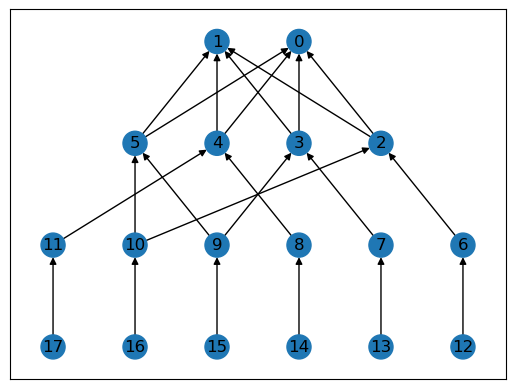

In [11]:
#draw pedigree
draw_pedigree(test_ts.tree_sequence())

In [12]:
#simulate ancestry (ancestral recombination graph) based on pedigree with recombination parameter
arg = msprime.sim_ancestry(
    initial_state=test_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0.00025)

In [13]:
print(arg.dump_tables())

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤═════════════════╗
║id│flags│location│parents│metadata         ║
╠══╪═════╪════════╪═══════╪═════════════════╣
║0 │    0│        │ -1, -1│ {'file_id': '0'}║
║1 │    0│        │ -1, -1│ {'file_id': '1'}║
║2 │    0│        │   0, 1│ {'file_id': '2'}║
║3 │    0│        │   0, 1│ {'file_id': '3'}║
║4 │    0│        │   0, 1│ {'file_id': '4'}║
║5 │    0│        │   0, 1│ {'file_id': '5'}║
║6 │    0│        │   2, 2│ {'file_id': '6'}║
║7 │    0│        │   3, 3│ {'file_id': '7'}║
║8 │    0│        │   4, 4│ {'file_id': '8'}║
║9 │    0│        │   3, 5│ {'file_id': '9'}║
║10│    0│        │   2, 5│{'file_id': '10'}║
║11│    0│        │   4, 4│{'file_id': '11'}║
║12│    0│        │   6, 6│{'file_id': '12'}║
║13│    0│        │   7, 7│{'file_id': '13'}║
║14│    0│        │   8, 8│{'file_id': '14'}║
║15│    0│        │   9, 9│{'file_id': '15'}║
║16│    0│        │ 10, 10│{'file_i

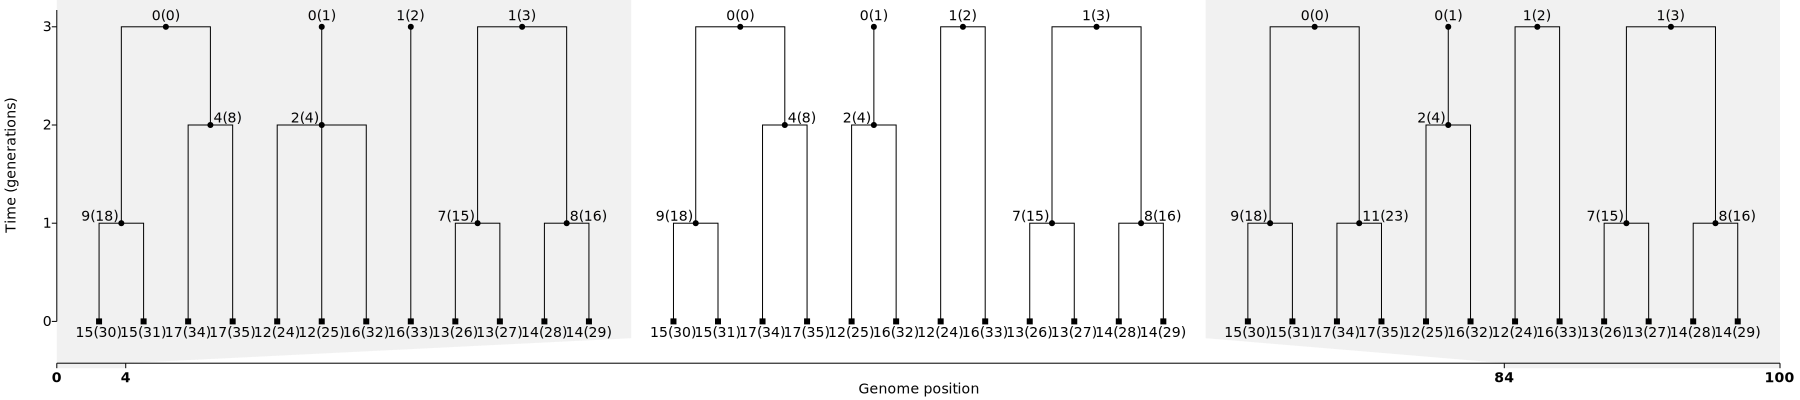

In [14]:
#draw ARG
draw_ancestry(arg, x_size = 1800)

In [15]:
#simulate ARG with 0 recombination rate
arg_norec = msprime.sim_ancestry(
    initial_state=test_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0)

In [16]:
print(arg_norec.dump_tables())

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤═════════════════╗
║id│flags│location│parents│metadata         ║
╠══╪═════╪════════╪═══════╪═════════════════╣
║0 │    0│        │ -1, -1│ {'file_id': '0'}║
║1 │    0│        │ -1, -1│ {'file_id': '1'}║
║2 │    0│        │   0, 1│ {'file_id': '2'}║
║3 │    0│        │   0, 1│ {'file_id': '3'}║
║4 │    0│        │   0, 1│ {'file_id': '4'}║
║5 │    0│        │   0, 1│ {'file_id': '5'}║
║6 │    0│        │   2, 2│ {'file_id': '6'}║
║7 │    0│        │   3, 3│ {'file_id': '7'}║
║8 │    0│        │   4, 4│ {'file_id': '8'}║
║9 │    0│        │   3, 5│ {'file_id': '9'}║
║10│    0│        │   2, 5│{'file_id': '10'}║
║11│    0│        │   4, 4│{'file_id': '11'}║
║12│    0│        │   6, 6│{'file_id': '12'}║
║13│    0│        │   7, 7│{'file_id': '13'}║
║14│    0│        │   8, 8│{'file_id': '14'}║
║15│    0│        │   9, 9│{'file_id': '15'}║
║16│    0│        │ 10, 10│{'file_i

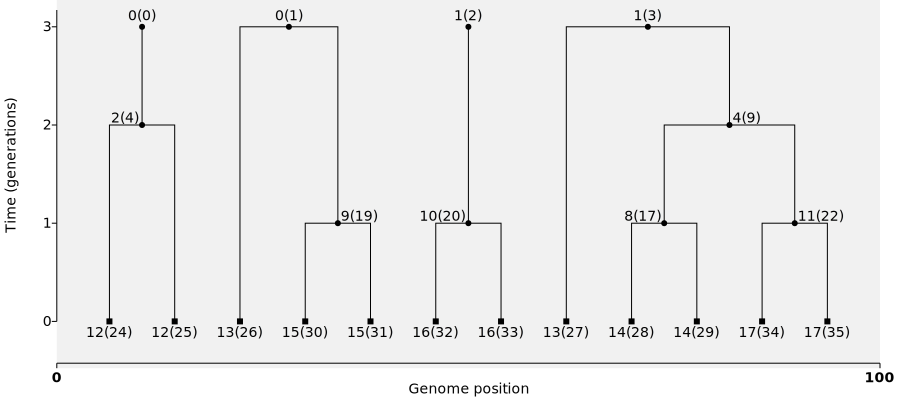

In [17]:
#draw ARG
draw_ancestry(arg_norec, x_size = 900)